In [5]:
%pip install tweepy==4.9.0 -q

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import config as cf
import tweepy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [2]:
column_names = ['created_at', 'text', 'favorite_count', 'retweet_count', 'id', 'screen_name', 'name', 'followers_count', 'friends_count', 'verified']
df = pd.read_csv('CryptoCommunity_twitter_1602_2202.csv', names=column_names, parse_dates=['created_at'])
df = df.drop_duplicates()
df = df.dropna()

In [3]:
phrase = 'NFT projects : NFT project : NFT : Decentralised Social : decentralisation : privacy : interoperability : Dapps : DAO : DAOs : DeFi : DEXs : Lending : lending : borrowing : Borrowing : Futures : Options : Capital Markets : capital markets : Launchpads : Staking'
print(phrase)

NFT projects : NFT project : NFT : Decentralised Social : decentralisation : privacy : interoperability : Dapps : DAO : DAOs : DeFi : DEXs : Lending : lending : borrowing : Borrowing : Futures : Options : Capital Markets : capital markets : Launchpads : Staking


In [4]:
enter_keywords_to_search = input("Enter keywords separated with a '-' without spaces : ")
keywords = enter_keywords_to_search.split(':')

print(keywords)


['NFT projects ', ' NFT project ', ' NFT ', ' Decentralised Social ', ' decentralisation ', ' privacy ', ' interoperability ', ' Dapps ', ' DAO ', ' DAOs ', ' DeFi ', ' DEXs ', ' Lending ', ' lending ', ' borrowing ', ' Borrowing ', ' Futures ', ' Options ', ' Capital Markets ', ' capital markets ', ' Launchpads ', ' Staking']


In [5]:
index_of_max = df[column_names[7]].idxmax()
print('highest followers - @',df[column_names[5]][index_of_max], ' - uptil ', df[column_names[0]][index_of_max])

highest followers - @ Reuters  - uptil  2023-02-16 02:20:00


In [6]:
def distinct_screen_names(df):
    distinct_names = [df.iloc[0]['screen_name']]
    indices = [0]
    # Iterate through the dataframe and compare the current and previous 'screen_name' values
    for i in range(1, len(df)):
        current_name = df.iloc[i]['screen_name']
        previous_name = df.iloc[i-1]['screen_name']
        if current_name != previous_name:
            distinct_names.append(current_name)
            indices.append(i)
    # Create a dataframe from the lists of distinct names and indices
    data = {'screen_name': distinct_names, 'index': indices}
    df_out = pd.DataFrame(data)
    return df_out


In [7]:
distinct_df = distinct_screen_names(df)
distinct_df.head()

,screen_name,index
0,Reuters,0
1,WSJ,24
2,business,26
3,citizentvkenya,32
4,MarketWatch,33


In [8]:
followers_counts = df.loc[distinct_df['index'], 'followers_count']

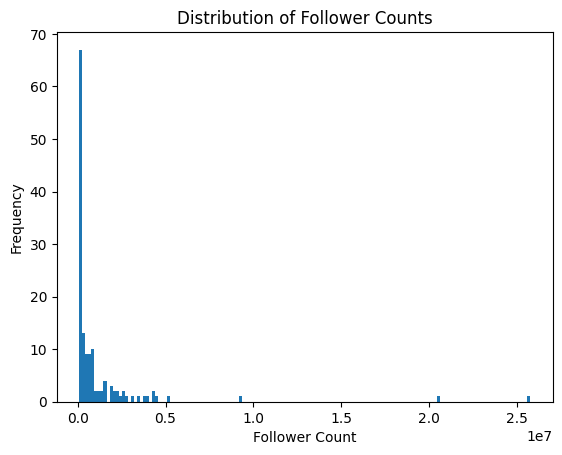

In [9]:
follower_counts = followers_counts[:140]
usernames = distinct_df['screen_name'][:140]
plt.hist(follower_counts, bins=150)
plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.title('Distribution of Follower Counts')
plt.show()

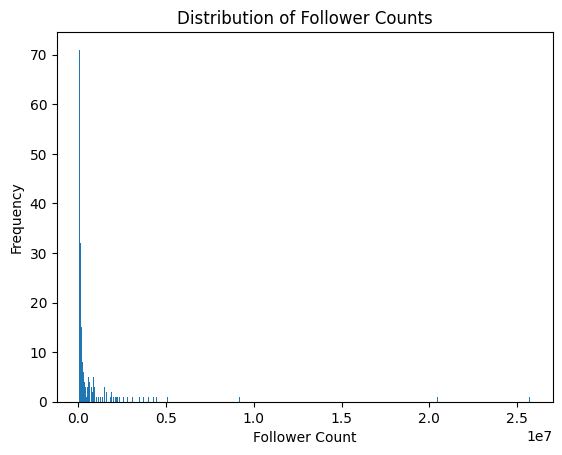

In [16]:
follower_counts = followers_counts[:200]
usernames = distinct_df['screen_name'][:200]
plt.hist(follower_counts, bins=500)
plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.title('Distribution of Follower Counts')
plt.show()

c:\Users\prikarsys\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


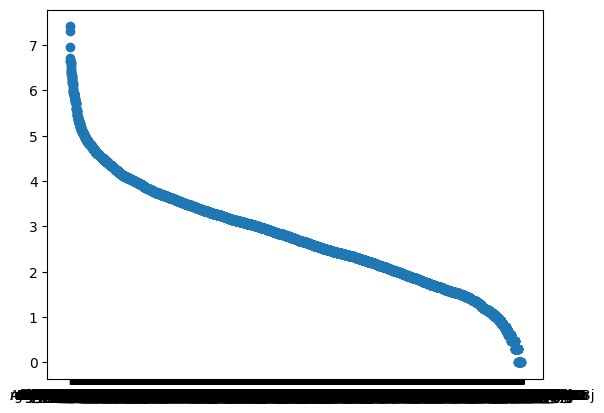

In [24]:
# Take the first 200 values of the follower_counts
follower_counts = followers_counts
usernames = distinct_df['screen_name']

# Calculate the logarithm of the follower_counts and usernames
log_follower_counts = np.log10(follower_counts)
log_usernames = usernames

# Create a scatter plot of the logarithm of the values
plt.scatter(log_usernames, log_follower_counts)

# Add labels to the x and y axes
# plt.xlabel('Log of usernames')
# plt.ylabel('Log of follower counts')

# Show the plot
plt.show()

C:\Users\prikarsys\AppData\Local\Temp\ipykernel_8032\4058898697.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(user_indices), log_follower_counts)


ValueError: x and y must be the same size

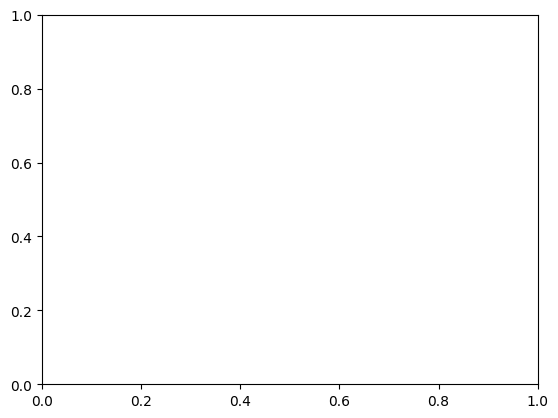

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Take the first 200 values of the follower_counts
follower_counts = followers_counts[:200]

# Calculate the logarithm of the follower_counts
log_follower_counts = np.log10(follower_counts)

# Create an array of indices for the usernames
user_indices = np.arange(len(usernames))

# Create a scatter plot of the logarithm of the values
plt.scatter(np.log10(user_indices), log_follower_counts)

# Add labels to the x and y axes
plt.xlabel('Log of usernames')
plt.ylabel('Log of follower counts')

# Show the plot
plt.show()

In [105]:
# write the dataframe to a CSV file
# distinct_df.to_csv('targets.csv', index=False)

In [15]:
def user_relevance(keywords, username, tweets_to_look):
    username = username
    tweets = []
    for tweet in tweepy.Cursor(cf.api.user_timeline, screen_name=username, tweet_mode='extended').items(tweets_to_look):
        tweets.append(tweet.full_text)
    data = {'tweets': tweets}
    texts_posted = pd.DataFrame(data)
    phrases = texts_posted['tweets']
    keywords = keywords
    vectorizer = TfidfVectorizer()
    tfidf_keywords = vectorizer.fit_transform(keywords)
    tfidf_phrases = vectorizer.transform(phrases)
    similarity_matrix = cosine_similarity(tfidf_phrases, tfidf_keywords)
    # print(similarity_matrix)
    mean_similarity = np.mean(similarity_matrix)
    print(f' @{username} :: Similarity - {mean_similarity}')
    return mean_similarity        # - - - - - - - - - - - - - - - - - - gives you the measure of how much this user is relevant as our target

In [175]:
user_relevance(keywords, distinct_df['screen_name'][0], 50)

Retrieved 50 tweets for @Reuters


0.00128564869306645

In [20]:
relevance = []
length=14
# length=len(distinct_df)
for i in range (0,length):
    relevance.append(user_relevance(keywords, distinct_df.iloc[i]["screen_name"], 200))

 @Reuters :: Similarity - 0.0019453547942064125
 @WSJ :: Similarity - 0.0024615518643585294
 @business :: Similarity - 0.003264766996486337
 @citizentvkenya :: Similarity - 0.0
 @MarketWatch :: Similarity - 0.0035745277412176945
 @EconomicTimes :: Similarity - 0.0014525454835587668
 @ntvkenya :: Similarity - 0.0004990000145066562
 @BusinessInsider :: Similarity - 0.002669060283849489
 @inquirerdotnet :: Similarity - 0.0019791183034198875
 @NationAfrica :: Similarity - 0.0006152515411787608
 @CoinDesk :: Similarity - 0.008591815668963958
 @BTCTN :: Similarity - 0.0081875256251145
 @daily_trust :: Similarity - 0.0027213124220184797
 @ReutersBiz :: Similarity - 0.0026050608953463745


In [21]:
data = {'screen_name': distinct_df.iloc[0:length]["screen_name"], 'relevance': relevance}
df_out = pd.DataFrame(data)

In [22]:
df_out = df_out.sort_values('relevance', ascending=False)

In [24]:
df_out

,screen_name,relevance
10,CoinDesk,0.008592
11,BTCTN,0.008188
4,MarketWatch,0.003575
2,business,0.003265
12,daily_trust,0.002721
7,BusinessInsider,0.002669
13,ReutersBiz,0.002605
1,WSJ,0.002462
8,inquirerdotnet,0.001979
0,Reuters,0.001945


In [ ]:
df_out = df_out[df_out.relevance > 0]

In [197]:
df_out.to_csv('targets_1.csv', index=False)

In [198]:
target_df = pd.read_csv('targets_1.csv')

In [205]:
target_df.head()

,screen_name,relevance
0,bitfinex,0.047630
1,BSCNews,0.026075
2,chainlink,0.023704
3,CoinDesk,0.013698
4,CNBCTV18News,0.012856
